In [1]:
# -*- coding: utf-8 -*-

#import os
#os.chdir('C:\\Users\\CAFE-02\\Desktop\\sample1')
#os.getcwd()

import pandas as pd
import requests
import lxml.html
import time
import re

URL = 'https://connpass.com/upcoming_events/'
connpass_df = pd.DataFrame()

FLAG = False
n = 0
while True:
    time.sleep(1) # １秒以上がエチケット
    n += 1
    url = URL +'?page=' + str(n)
    try:
        response = requests.get(url)
    except:
        break
    else:
        if FLAG:
            break
    html = lxml.html.fromstring(response.content)

    print("page:", n, end="  ")
    
    for k in range(1,21):
        try:
            xpath = '//*[@id="main"]/div[1]/div[' + str(k) + ']/div[1]/p[1]'
            year = html.xpath(xpath)[0].text
            if int(year) > 2020:
                FLAG = True
                break
        except:
            break
    
        xpath = '//*[@id="main"]/div[1]/div[' + str(k) + ']/div[2]/div/p[2]/a'
        title = html.xpath(xpath)[0].text

        xpath2 = '//*[@id="main"]/div[1]/div[' + str(k) + ']/div[2]/div/p[4]/span'
        place0 = html.xpath(xpath2)[0].text
        place1 = re.sub("[\n ]+", "", place0)
        place2 = re.sub("[\t ]+", "", place1)
        place = re.sub("〒[0-9]{3}-[0-9]{4}", "", place2)
    
        print(k, end="  ")
        df2 = pd.DataFrame([[title, place]], columns=['title', 'place'])
        connpass_df = connpass_df.append(df2, ignore_index=True)
    print()
print("Finish!")

connpass_df.to_csv( 'output1.tsv', sep='\t' )
connpass_df.shape

page: 1  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
page: 2  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
page: 3  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
page: 4  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
page: 5  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
page: 6  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
page: 7  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
page: 8  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
page: 9  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
page: 10  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
page: 11  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
page: 12  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
page: 13  1  2  3  4  5  

(1426, 2)

In [2]:
import re

connpass_df['pref'] = None

for index, row in connpass_df.iterrows():
    result = re.match(r"(...??[都道府県])",row['place'])
    if result:
        pref = result.group(0)
    else:
        if row['place']=="(場所未定)":
            pref = "(場所未定)"
        else:
            pref = "その他"
        
    connpass_df.loc[[index],["pref"]] = pref
    
connpass_df.head()

,title,place,pref
0,PyData.Fukui PythonでAIましょう,福井県福井市手寄１丁目４－１,福井県
1,ハノイITもくもく会 #6,"7TrungHòa,QuậnCầuGiấy,HàNội",その他
2,BeginnersLab #3 ベイズ勉強会(8.ベイズの定理から),沖縄県宜野湾市志真志3丁目4−21-203,沖縄県
3,[Math & Coding] パターン認識と機械学習（PRML）#8,大阪府大阪市北区南森町２丁目３−２８,大阪府
4,オンラインもくもく会(朝)#1,slack,その他


In [3]:
connpass_df['count'] = 1
df_pivot = connpass_df.pivot_table(values=['count'], columns=['pref'], aggfunc='sum')
df_result = df_pivot.T.sort_values(by=["count"], ascending=False)
df_result.head()

,count
pref,
東京都,678
その他,339
大阪府,76
愛知県,56
福岡県,28


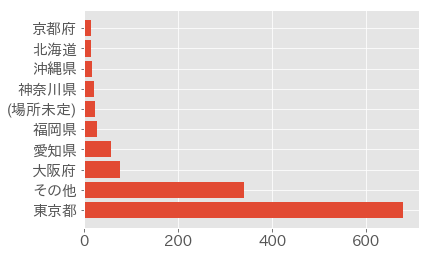

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

x = df_result.index.values[:10]
y = df_result.iloc[:10, 0]

plt.barh(x, y)
plt.show()